# Importing Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the datasets

In [2]:
# reading train, farm, weather data sets
train=pd.read_csv("/kaggle/input/robust-yield-prediction/train_data.csv",nrows=3000000)
farm=pd.read_csv("/kaggle/input/robust-yield-prediction/farm_data.csv",low_memory=False)
weather=pd.read_csv("/kaggle/input/robust-yield-prediction/train_weather.csv",low_memory=False)

In [3]:
#function to calculate the memory used by datasets
def memory_usage(df):
    return(round(df.memory_usage(deep=True).sum() / 1024 ** 2, 2))

In [4]:
#printing the memory usage by each dataset
print('Memory used by train_data:', memory_usage(train), 'MB')
print('Memory used by farm_data:', memory_usage(farm), 'MB')
print('Memory used by weather_data:', memory_usage(weather), 'MB')

Memory used by train_data: 607.1 MB
Memory used by farm_data: 0.32 MB
Memory used by weather_data: 26.9 MB


In [5]:
train.head() #accesing top 5 rows

date     farm_id ingredient_type  yield
0  2016-01-01 00:00:00  fid_110884           ing_w    0.0
1  2016-01-01 00:00:00   fid_90053           ing_w    0.0
2  2016-01-01 00:00:00   fid_17537           ing_w    0.0
3  2016-01-01 00:00:00  fid_110392           ing_w    0.0
4  2016-01-01 00:00:00   fid_62402           ing_w    0.0

In [6]:
train.tail() #accesing bottom 5 rows

date     farm_id ingredient_type   yield
2999995  2016-02-25 22:00:00  fid_107841           ing_w  0.0000
2999996  2016-02-25 22:00:00   fid_70417           ing_w  0.0000
2999997  2016-02-25 22:00:00  fid_110278           ing_w  0.0000
2999998  2016-02-25 22:00:00   fid_51884           ing_w  4.0954
2999999  2016-02-25 22:00:00   fid_12776           ing_w  0.0000

In [7]:
train.shape #checking the shape of train data

(3000000, 4)

In [8]:
train.dtypes #chrcking the datatypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

In [9]:
train.info() #checking the info of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   farm_id          object 
 2   ingredient_type  object 
 3   yield            float64
dtypes: float64(1), object(3)
memory usage: 91.6+ MB


In [10]:
train.isnull().sum() #checking null values

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [11]:
train.nunique() #checking unique values

date                 1343
farm_id              1420
ingredient_type         4
yield              592829
dtype: int64

In [12]:
farm.head() #accesing top 5 rows

farm_id  operations_commencing_year  num_processing_plants  \
0  fid_110884                      2008.0                    NaN   
1   fid_90053                      2004.0                    NaN   
2   fid_17537                      1991.0                    NaN   
3  fid_110392                      2002.0                    NaN   
4   fid_62402                      1975.0                    NaN   

      farm_area farming_company deidentified_location  
0    690.455096     Obery Farms         location 7369  
1    252.696160     Obery Farms         location 7369  
2    499.446528     Obery Farms         location 7369  
3   2200.407555     Obery Farms         location 7369  
4  10833.140121     Obery Farms         location 7369

In [13]:
farm.tail() #accesing bottom 5 rows

farm_id  operations_commencing_year  num_processing_plants  \
1444  fid_41664                      1914.0                    NaN   
1445  fid_14529                         NaN                    NaN   
1446  fid_46454                      1997.0                    NaN   
1447  fid_24103                      2001.0                    NaN   
1448  fid_34139                      2001.0                    NaN   

        farm_area    farming_company deidentified_location  
1444  1822.663957    Sanderson Farms         location 5150  
1445   399.297094        Obery Farms         location 5150  
1446  1046.552295    Sanderson Farms         location 5150  
1447  2766.186825  Dole Food Company         location 5150  
1448  8572.252713        Wayne Farms         location 5150

In [14]:
farm.shape #checking the shape of farm data

(1449, 6)

In [15]:
farm.dtypes #checking the datatypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [16]:
farm.info() #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   farm_id                     1449 non-null   object 
 1   operations_commencing_year  675 non-null    float64
 2   num_processing_plants       355 non-null    float64
 3   farm_area                   1449 non-null   float64
 4   farming_company             1449 non-null   object 
 5   deidentified_location       1449 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.0+ KB


In [17]:
farm.isnull().sum() #checking null values

farm_id                          0
operations_commencing_year     774
num_processing_plants         1094
farm_area                        0
farming_company                  0
deidentified_location            0
dtype: int64

In [18]:
farm.nunique() #checking unique values

farm_id                       1434
operations_commencing_year     116
num_processing_plants           18
farm_area                     1397
farming_company                 16
deidentified_location           16
dtype: int64

In [19]:
weather.head() #accessing top 5 rows

timestamp deidentified_location  temp_obs  cloudiness  \
0  2016-01-01 00:00:00         location 7369      25.0         6.0   
1  2016-01-01 01:00:00         location 7369      24.4         NaN   
2  2016-01-01 02:00:00         location 7369      22.8         2.0   
3  2016-01-01 03:00:00         location 7369      21.1         2.0   
4  2016-01-01 04:00:00         location 7369      20.0         2.0   

   wind_direction  dew_temp  pressure_sea_level  precipitation  wind_speed  
0             0.0      20.0              1019.7            NaN         0.0  
1            70.0      21.1              1020.2           -1.0         1.5  
2             0.0      21.1              1020.2            0.0         0.0  
3             0.0      20.6              1020.1            0.0         0.0  
4           250.0      20.0              1020.0           -1.0         2.6

In [20]:
weather.tail() #accessing bottom 5 rows

timestamp deidentified_location  temp_obs  cloudiness  \
139768  2016-12-31 19:00:00         location 5150       3.0         NaN   
139769  2016-12-31 20:00:00         location 5150       2.8         2.0   
139770  2016-12-31 21:00:00         location 5150       2.8         NaN   
139771  2016-12-31 22:00:00         location 5150       2.2         NaN   
139772  2016-12-31 23:00:00         location 5150       1.7         NaN   

        wind_direction  dew_temp  pressure_sea_level  precipitation  \
139768           180.0      -8.0                 NaN            NaN   
139769           180.0      -8.9              1007.4            NaN   
139770           180.0      -7.2              1007.5            NaN   
139771           170.0      -6.7              1008.0            NaN   
139772           180.0      -5.6              1008.5           -1.0   

        wind_speed  
139768         5.7  
139769         7.7  
139770         5.1  
139771         4.6  
139772         8.8

In [21]:
weather.shape #checking the shape of weather data

(139773, 9)

In [22]:
weather.info() #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              139773 non-null  object 
 1   deidentified_location  139773 non-null  object 
 2   temp_obs               139718 non-null  float64
 3   cloudiness             70600 non-null   float64
 4   wind_direction         133505 non-null  float64
 5   dew_temp               139660 non-null  float64
 6   pressure_sea_level     129155 non-null  float64
 7   precipitation          89484 non-null   float64
 8   wind_speed             139469 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.6+ MB


In [23]:
weather.isnull().sum() #checking null values

timestamp                    0
deidentified_location        0
temp_obs                    55
cloudiness               69173
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
dtype: int64

In [24]:
weather.nunique() #checking unique values

timestamp                8784
deidentified_location      16
temp_obs                  619
cloudiness                 10
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [25]:
train.describe() #descriptive statistics

yield
count  3.000000e+06
mean   1.050657e+03
std    4.824421e+04
min    0.000000e+00
25%    1.300415e+01
50%    6.786225e+01
75%    2.333080e+02
max    8.243400e+06

In [26]:
train.describe(include = ['object'])

date    farm_id ingredient_type
count               3000000    3000000         3000000
unique                 1343       1420               4
top     2016-02-01 19:00:00  fid_63700           ing_w
freq                   2313       7455         1821448

In [27]:
farm.describe() #descriptive statistics

operations_commencing_year  num_processing_plants     farm_area
count                  675.000000             355.000000   1449.000000
mean                  1967.957037               7.740845   8557.460363
std                     31.054030               3.333683  10290.860757
min                   1900.000000               5.000000     26.291549
25%                   1949.000000               5.000000   2137.883836
50%                   1970.000000               7.000000   5357.994719
75%                   1995.000000               9.000000  10746.647428
max                   2017.000000              30.000000  81290.125000

In [28]:
farm.describe(include = ['object'])

farm_id farming_company deidentified_location
count        1449            1449                  1449
unique       1434              16                    16
top     fid_29387     Obery Farms         location 5290
freq            2             549                   274

In [29]:
from scipy.stats import skew #necessary import

In [30]:
print(farm.skew()) #checking skewness of farm data

operations_commencing_year   -0.376338
num_processing_plants         2.231123
farm_area                     2.950772
dtype: float64


In [31]:
weather.describe() #descriptive statistics

temp_obs    cloudiness  wind_direction       dew_temp  \
count  139718.000000  70600.000000   133505.000000  139660.000000   
mean       14.418106      2.149306      180.526632       7.350158   
std        10.626595      2.599150      111.523629       9.790235   
min       -28.900000      0.000000        0.000000     -35.000000   
25%         7.200000      0.000000       80.000000       0.600000   
50%        15.000000      2.000000      190.000000       8.300000   
75%        22.200000      4.000000      280.000000      14.400000   
max        47.200000      9.000000      360.000000      26.100000   

       pressure_sea_level  precipitation     wind_speed  
count       129155.000000   89484.000000  139469.000000  
mean          1016.158038       0.983047       3.560527  
std              7.629684       8.463678       2.335874  
min            968.200000      -1.000000       0.000000  
25%           1011.800000       0.000000       2.100000  
50%           1016.400000       0.000000       3.100000  
75%           1020.800000       0.000000       5.000000  
max           1045.500000     343.000000      19.000000

In [32]:
weather.describe(include = ['object'])

timestamp deidentified_location
count                139773                139773
unique                 8784                    16
top     2016-07-02 00:00:00         location 7369
freq                     16                  8784

In [33]:
print(weather.skew()) #checking skewness of weather data

temp_obs              -0.318658
cloudiness             0.978444
wind_direction        -0.168956
dew_temp              -0.450697
pressure_sea_level    -0.415321
precipitation         18.286161
wind_speed             0.829448
dtype: float64


In [34]:
train.nunique(axis = 0, dropna = False)

date                 1343
farm_id              1420
ingredient_type         4
yield              592829
dtype: int64

In [35]:
train.farm_id.value_counts() #checking the value counts

fid_63700     7455
fid_68761     6384
fid_47796     5368
fid_68690     5368
fid_26064     5368
              ... 
fid_103807     525
fid_109189      84
fid_98608       84
fid_24451       84
fid_31778       29
Name: farm_id, Length: 1420, dtype: int64

In [36]:
train.date.value_counts()

2016-02-01 19:00:00    2313
2016-01-23 07:00:00    2312
2016-02-04 02:00:00    2312
2016-01-22 17:00:00    2312
2016-01-26 20:00:00    2311
                       ... 
2016-02-18 01:00:00    2061
2016-01-20 11:00:00    2008
2016-02-24 11:00:00    1992
2016-02-23 09:00:00    1871
2016-02-25 22:00:00      47
Name: date, Length: 1343, dtype: int64

In [37]:
farm.nunique(axis = 0 , dropna = False)

farm_id                       1434
operations_commencing_year     117
num_processing_plants           19
farm_area                     1397
farming_company                 16
deidentified_location           16
dtype: int64

In [38]:
farm.num_processing_plants.value_counts()

5.0     109
6.0      67
8.0      37
7.0      33
9.0      25
10.0     25
12.0     19
11.0     14
13.0      8
15.0      5
14.0      4
16.0      2
17.0      2
20.0      1
18.0      1
25.0      1
30.0      1
23.0      1
Name: num_processing_plants, dtype: int64

In [39]:
# Train Weather Dataset Analysis
weather.nunique(axis = 0, dropna = False)

timestamp                8784
deidentified_location      16
temp_obs                  620
cloudiness                 11
wind_direction             44
dew_temp                  523
pressure_sea_level        710
precipitation             129
wind_speed                 59
dtype: int64

# Data Cleaning

**Train data** 

In [40]:
#Convert date Object to datetime format
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')

In [41]:
#Type Conversion
train['farm_id'] = train['farm_id'].astype('str')

In [42]:
train.isna().mean().round(4) * 100

date               0.0
farm_id            0.0
ingredient_type    0.0
yield              0.0
dtype: float64

In [43]:
train.duplicated().sum()

3

In [44]:
train1=train.drop_duplicates() #removing duplicates value

**Farm data**

In [45]:
#Drop 'operations_commencing_year' column from the farm data
farm.drop('operations_commencing_year', axis=1, inplace=True)

In [46]:
#Type Casting
farm['farm_id'] = farm['farm_id'].astype('str')

In [47]:
#Fill missing values with median 
farm['num_processing_plants'].fillna(farm['num_processing_plants'].median(), inplace=True)

In [48]:
farm.isnull().sum()

farm_id                  0
num_processing_plants    0
farm_area                0
farming_company          0
deidentified_location    0
dtype: int64

In [49]:
#Type Conversion
farm['num_processing_plants'] = farm['num_processing_plants'].astype('int64')

In [50]:
farm.isna().mean().round(4) * 100

farm_id                  0.0
num_processing_plants    0.0
farm_area                0.0
farming_company          0.0
deidentified_location    0.0
dtype: float64

In [51]:
farm.duplicated().sum() #checking duplicate value

0

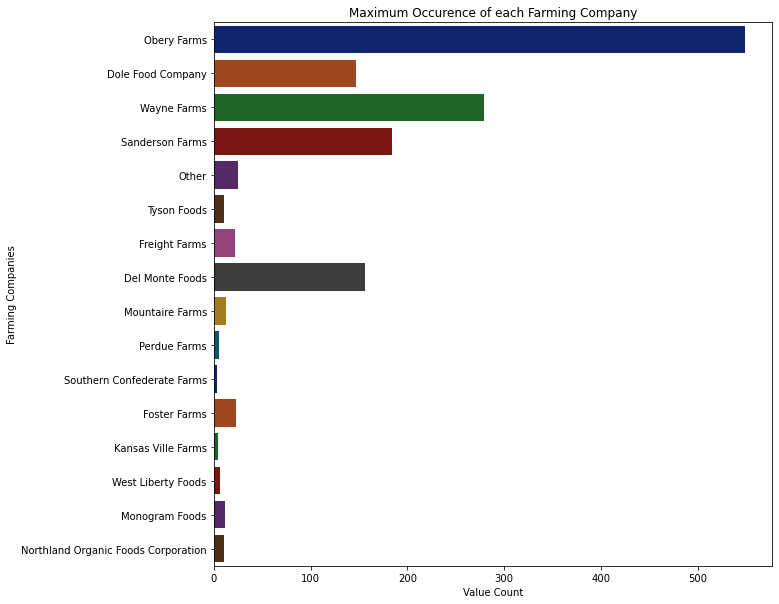

Obery Farms                            549
Wayne Farms                            279
Sanderson Farms                        184
Del Monte Foods                        156
Dole Food Company                      147
Other                                   25
Foster Farms                            23
Freight Farms                           22
Mountaire Farms                         13
Monogram Foods                          12
Tyson Foods                             11
Northland Organic Foods Corporation     10
West Liberty Foods                       6
Perdue Farms                             5
Kansas Ville Farms                       4
Southern Confederate Farms               3
Name: farming_company, dtype: int64

In [52]:
#Countplot to display the observations/max occurence in 'farming_company' column
plt.figure(figsize=(10,10))
sns.countplot(y="farming_company", data= farm,palette='dark' )
plt.title("Maximum Occurence of each Farming Company")
plt.ylabel("Farming Companies")
plt.xlabel("Value Count")
plt.show()

#Unique value count of the farming_company column
farm.farming_company.value_counts()

**Weather data**

In [53]:
#Convert date Object to datetime format
weather['timestamp'] = pd.to_datetime(weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [54]:
#Dropping 'cloudiness' column
weather.drop('cloudiness', axis = 1, inplace =  True)

In [55]:
weather.drop('timestamp', axis = 1, inplace =  True)

In [56]:
weather.isna().mean().round(4) * 100

deidentified_location     0.00
temp_obs                  0.04
wind_direction            4.48
dew_temp                  0.08
pressure_sea_level        7.60
precipitation            35.98
wind_speed                0.22
dtype: float64

In [57]:
weather.fillna(weather.median(),inplace=True)

In [58]:
weather.duplicated().sum() #checking duplicate values

2064

In [59]:
weather.drop_duplicates() #removing duplicate values


deidentified_location  temp_obs  wind_direction  dew_temp  \
0              location 7369      25.0             0.0      20.0   
1              location 7369      24.4            70.0      21.1   
2              location 7369      22.8             0.0      21.1   
3              location 7369      21.1             0.0      20.6   
4              location 7369      20.0           250.0      20.0   
...                      ...       ...             ...       ...   
139768         location 5150       3.0           180.0      -8.0   
139769         location 5150       2.8           180.0      -8.9   
139770         location 5150       2.8           180.0      -7.2   
139771         location 5150       2.2           170.0      -6.7   
139772         location 5150       1.7           180.0      -5.6   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0         0.0  
1                   1020.2           -1.0         1.5  
2                   1020.2            0.0         0.0  
3                   1020.1            0.0         0.0  
4                   1020.0           -1.0         2.6  
...                    ...            ...         ...  
139768              1016.4            0.0         5.7  
139769              1007.4            0.0         7.7  
139770              1007.5            0.0         5.1  
139771              1008.0            0.0         4.6  
139772              1008.5           -1.0         8.8  

[137709 rows x 7 columns]

# Merging the datasets

In [60]:
train_farm = pd.merge(train1,farm,on='farm_id') #merging train and farm data on farm id

In [61]:
train_farm.head() #checking the top 5 rows

date     farm_id ingredient_type  yield  \
0 2016-01-01 00:00:00  fid_110884           ing_w    0.0   
1 2016-01-01 01:00:00  fid_110884           ing_w    0.0   
2 2016-01-01 02:00:00  fid_110884           ing_w    0.0   
3 2016-01-01 03:00:00  fid_110884           ing_w    0.0   
4 2016-01-01 04:00:00  fid_110884           ing_w    0.0   

   num_processing_plants   farm_area farming_company deidentified_location  
0                      7  690.455096     Obery Farms         location 7369  
1                      7  690.455096     Obery Farms         location 7369  
2                      7  690.455096     Obery Farms         location 7369  
3                      7  690.455096     Obery Farms         location 7369  
4                      7  690.455096     Obery Farms         location 7369

In [62]:
#Renaming date column as timestamp
train_farm.rename(columns = {'date':'timestamp'},inplace = True)

In [63]:
train_farm.deidentified_location.value_counts()

location 2532    426089
location 8421    411640
location 5489    393541
location 5410    384284
location 5290    372024
location 5150    232826
location 7369    139265
location 6364    124748
location 5833    117509
location 5677     92204
location 565      89571
location 959      84538
location 1784     65343
location 4525     56307
location 7048     49541
location 868      17828
Name: deidentified_location, dtype: int64

In [64]:
train_farm.drop('deidentified_location', axis=1, inplace=True) #dropping deidentified loaction column

In [65]:
train_farm.shape #checking the shape

(3057258, 7)

In [66]:
train_farm.dtypes #checking the datatypes

timestamp                datetime64[ns]
farm_id                          object
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
dtype: object

In [67]:
train_farm.nunique() #checking uniques values

timestamp                  1343
farm_id                    1420
ingredient_type               4
yield                    592829
num_processing_plants        18
farm_area                  1384
farming_company              16
dtype: int64

In [68]:
train_farm.ingredient_type.value_counts(normalize=True)*100 #normalizinge the values

ing_w    60.824209
ing_x    19.581828
ing_y    13.165392
ing_z     6.428571
Name: ingredient_type, dtype: float64

In [69]:
train_farm.farming_company.value_counts(normalize=True)*100

Obery Farms                            40.360414
Wayne Farms                            21.653946
Sanderson Farms                        11.098311
Dole Food Company                      10.393267
Del Monte Foods                         8.565191
Foster Farms                            2.108916
Other                                   1.170951
Freight Farms                           1.052675
Monogram Foods                          0.599001
Perdue Farms                            0.570642
Mountaire Farms                         0.564264
Tyson Foods                             0.526910
Northland Organic Foods Corporation     0.481804
West Liberty Foods                      0.401209
Kansas Ville Farms                      0.257649
Southern Confederate Farms              0.194848
Name: farming_company, dtype: float64

In [70]:
train_farm_weather = pd.merge(train_farm,weather,left_index=True,right_index=True)#merging train-farm and weather

In [71]:
train_farm_weather.shape #checking the shape

(139773, 14)

In [72]:
train_farm_weather.head() #checking the top 5 rows

timestamp     farm_id ingredient_type  yield  \
0 2016-01-01 00:00:00  fid_110884           ing_w    0.0   
1 2016-01-01 01:00:00  fid_110884           ing_w    0.0   
2 2016-01-01 02:00:00  fid_110884           ing_w    0.0   
3 2016-01-01 03:00:00  fid_110884           ing_w    0.0   
4 2016-01-01 04:00:00  fid_110884           ing_w    0.0   

   num_processing_plants   farm_area farming_company deidentified_location  \
0                      7  690.455096     Obery Farms         location 7369   
1                      7  690.455096     Obery Farms         location 7369   
2                      7  690.455096     Obery Farms         location 7369   
3                      7  690.455096     Obery Farms         location 7369   
4                      7  690.455096     Obery Farms         location 7369   

   temp_obs  wind_direction  dew_temp  pressure_sea_level  precipitation  \
0      25.0             0.0      20.0              1019.7            0.0   
1      24.4            70.0      21.1              1020.2           -1.0   
2      22.8             0.0      21.1              1020.2            0.0   
3      21.1             0.0      20.6              1020.1            0.0   
4      20.0           250.0      20.0              1020.0           -1.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6

In [73]:
train_farm_weather.tail() #checking the bottom 5 rows

timestamp     farm_id ingredient_type  yield  \
139768 2016-01-23 04:00:00  fid_115440           ing_w    0.0   
139769 2016-01-23 05:00:00  fid_115440           ing_w    0.0   
139770 2016-01-23 06:00:00  fid_115440           ing_w    0.0   
139771 2016-01-23 07:00:00  fid_115440           ing_w    0.0   
139772 2016-01-23 08:00:00  fid_115440           ing_w    0.0   

        num_processing_plants    farm_area farming_company  \
139768                      7  2012.000271     Obery Farms   
139769                      7  2012.000271     Obery Farms   
139770                      7  2012.000271     Obery Farms   
139771                      7  2012.000271     Obery Farms   
139772                      7  2012.000271     Obery Farms   

       deidentified_location  temp_obs  wind_direction  dew_temp  \
139768         location 5150       3.0           180.0      -8.0   
139769         location 5150       2.8           180.0      -8.9   
139770         location 5150       2.8           180.0      -7.2   
139771         location 5150       2.2           170.0      -6.7   
139772         location 5150       1.7           180.0      -5.6   

        pressure_sea_level  precipitation  wind_speed  
139768              1016.4            0.0         5.7  
139769              1007.4            0.0         7.7  
139770              1007.5            0.0         5.1  
139771              1008.0            0.0         4.6  
139772              1008.5           -1.0         8.8

In [74]:
train_farm_weather.dtypes #checking the datatypes

timestamp                datetime64[ns]
farm_id                          object
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
dtype: object

In [75]:
train_farm_weather.info() #checking the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139773 entries, 0 to 139772
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              139773 non-null  datetime64[ns]
 1   farm_id                139773 non-null  object        
 2   ingredient_type        139773 non-null  object        
 3   yield                  139773 non-null  float64       
 4   num_processing_plants  139773 non-null  int64         
 5   farm_area              139773 non-null  float64       
 6   farming_company        139773 non-null  object        
 7   deidentified_location  139773 non-null  object        
 8   temp_obs               139773 non-null  float64       
 9   wind_direction         139773 non-null  float64       
 10  dew_temp               139773 non-null  float64       
 11  pressure_sea_level     139773 non-null  float64       
 12  precipitation          139773 non-null  floa

In [76]:
train_farm_weather.nunique() #checking unique values

timestamp                1343
farm_id                   102
ingredient_type             1
yield                     865
num_processing_plants       2
farm_area                  84
farming_company             7
deidentified_location      16
temp_obs                  619
wind_direction             43
dew_temp                  522
pressure_sea_level        709
precipitation             128
wind_speed                 58
dtype: int64

In [77]:
train_farm_weather.isnull().sum() #checking the null values

timestamp                0
farm_id                  0
ingredient_type          0
yield                    0
num_processing_plants    0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [78]:
train_farm_weather.ingredient_type.value_counts(normalize=True)*100

ing_w    100.0
Name: ingredient_type, dtype: float64

In [79]:
train_farm_weather.farming_company.value_counts(normalize=True)*100

Obery Farms          29.154415
Dole Food Company    26.889313
Wayne Farms          21.867600
Freight Farms         7.681026
Tyson Foods           5.764346
Sanderson Farms       4.802072
Other                 3.841228
Name: farming_company, dtype: float64

In [80]:
train_farm_weather.deidentified_location.value_counts(normalize=True)*100

location 7369    6.284476
location 5677    6.284476
location 5489    6.283760
location 5833    6.283760
location 2532    6.283760
location 565     6.283045
location 1784    6.283045
location 5290    6.281614
location 8421    6.281614
location 5410    6.279467
location 959     6.269451
location 6364    6.263728
location 7048    6.263728
location 4525    6.162850
location 868     6.162850
location 5150    6.048378
Name: deidentified_location, dtype: float64

In [81]:
train_farm_weather.isnull().sum()

timestamp                0
farm_id                  0
ingredient_type          0
yield                    0
num_processing_plants    0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [82]:
train_farm_weather.head()

timestamp     farm_id ingredient_type  yield  \
0 2016-01-01 00:00:00  fid_110884           ing_w    0.0   
1 2016-01-01 01:00:00  fid_110884           ing_w    0.0   
2 2016-01-01 02:00:00  fid_110884           ing_w    0.0   
3 2016-01-01 03:00:00  fid_110884           ing_w    0.0   
4 2016-01-01 04:00:00  fid_110884           ing_w    0.0   

   num_processing_plants   farm_area farming_company deidentified_location  \
0                      7  690.455096     Obery Farms         location 7369   
1                      7  690.455096     Obery Farms         location 7369   
2                      7  690.455096     Obery Farms         location 7369   
3                      7  690.455096     Obery Farms         location 7369   
4                      7  690.455096     Obery Farms         location 7369   

   temp_obs  wind_direction  dew_temp  pressure_sea_level  precipitation  \
0      25.0             0.0      20.0              1019.7            0.0   
1      24.4            70.0      21.1              1020.2           -1.0   
2      22.8             0.0      21.1              1020.2            0.0   
3      21.1             0.0      20.6              1020.1            0.0   
4      20.0           250.0      20.0              1020.0           -1.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6

In [83]:
train_farm_weather.dtypes #checking the datatypes

timestamp                datetime64[ns]
farm_id                          object
ingredient_type                  object
yield                           float64
num_processing_plants             int64
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
dtype: object

In [84]:
train_farm_weather.drop('timestamp', axis=1, inplace=True) #dropping the weather column

# Label Encoding for categorical columns

In [85]:
#Necessary Import
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()

In [87]:
train_farm_weather.farming_company = le.fit_transform(train_farm_weather.farming_company)

In [88]:
#changing the dataypes
train_farm_weather['farming_company'] = train_farm_weather['farming_company'].astype('category')

In [89]:
#changing the dataypes
train_farm_weather.deidentified_location = le.fit_transform(train_farm_weather.deidentified_location)

In [90]:
#changing the dataypes
train_farm_weather['deidentified_location'] = train_farm_weather['deidentified_location'].astype('category')

In [91]:
#changing the dataypes
train_farm_weather.ingredient_type = le.fit_transform(train_farm_weather.ingredient_type)

In [92]:
#changing the dataypes
train_farm_weather['ingredient_type'] =train_farm_weather['ingredient_type'].astype('category')

In [93]:
train_farm_weather.dtypes #checking the datatypes

farm_id                    object
ingredient_type          category
yield                     float64
num_processing_plants       int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
dtype: object

In [94]:
train_farm_weather.nunique() #checking the unique values

farm_id                  102
ingredient_type            1
yield                    865
num_processing_plants      2
farm_area                 84
farming_company            7
deidentified_location     16
temp_obs                 619
wind_direction            43
dew_temp                 522
pressure_sea_level       709
precipitation            128
wind_speed                58
dtype: int64

In [95]:
train_farm_weather.farming_company.value_counts()

2    40750
0    37584
6    30565
1    10736
5     8057
4     6712
3     5369
Name: farming_company, dtype: int64

In [96]:
train_farm_weather.head()

farm_id ingredient_type  yield  num_processing_plants   farm_area  \
0  fid_110884               0    0.0                      7  690.455096   
1  fid_110884               0    0.0                      7  690.455096   
2  fid_110884               0    0.0                      7  690.455096   
3  fid_110884               0    0.0                      7  690.455096   
4  fid_110884               0    0.0                      7  690.455096   

  farming_company deidentified_location  temp_obs  wind_direction  dew_temp  \
0               2                    12      25.0             0.0      20.0   
1               2                    12      24.4            70.0      21.1   
2               2                    12      22.8             0.0      21.1   
3               2                    12      21.1             0.0      20.6   
4               2                    12      20.0           250.0      20.0   

   pressure_sea_level  precipitation  wind_speed  
0              1019.7            0.0         0.0  
1              1020.2           -1.0         1.5  
2              1020.2            0.0         0.0  
3              1020.1            0.0         0.0  
4              1020.0           -1.0         2.6

In [97]:
train_farm_weather.deidentified_location.value_counts()

8     8784
12    8784
1     8783
6     8783
9     8783
0     8782
7     8782
4     8780
13    8780
5     8777
15    8763
10    8755
11    8755
2     8614
14    8614
3     8454
Name: deidentified_location, dtype: int64

In [98]:
train_farm_weather.ingredient_type.value_counts()

0    139773
Name: ingredient_type, dtype: int64

In [99]:
train_farm_weather.nunique()

farm_id                  102
ingredient_type            1
yield                    865
num_processing_plants      2
farm_area                 84
farming_company            7
deidentified_location     16
temp_obs                 619
wind_direction            43
dew_temp                 522
pressure_sea_level       709
precipitation            128
wind_speed                58
dtype: int64

In [100]:
#Descriptive Stats of Final Dataset
train_farm_weather.describe()

yield  num_processing_plants      farm_area       temp_obs  \
count  139773.000000          139773.000000  139773.000000  139773.000000   
mean        1.206757               6.961595    7987.541357      14.418335   
std        19.554758               0.274474   10005.255421      10.624511   
min         0.000000               5.000000      26.291549     -28.900000   
25%         0.000000               7.000000    2192.975315       7.200000   
50%         0.000000               7.000000    4559.028919      15.000000   
75%         0.000000               7.000000    8723.312991      22.200000   
max      1296.590000               7.000000   45283.987999      47.200000   

       wind_direction       dew_temp  pressure_sea_level  precipitation  \
count   139773.000000  139773.000000       139773.000000  139773.000000   
mean       180.951457       7.350926         1016.176419       0.629356   
std        109.011972       9.786314            7.334440       6.788452   
min          0.000000     -35.000000          968.200000      -1.000000   
25%         90.000000       0.600000         1012.200000       0.000000   
50%        190.000000       8.300000         1016.400000       0.000000   
75%        270.000000      14.400000         1020.400000       0.000000   
max        360.000000      26.100000         1045.500000     343.000000   

          wind_speed  
count  139773.000000  
mean        3.559526  
std         2.333431  
min         0.000000  
25%         2.100000  
50%         3.100000  
75%         5.000000  
max        19.000000

In [101]:
#Check for null values in the merged dataset
train_farm_weather.isnull().sum()

farm_id                  0
ingredient_type          0
yield                    0
num_processing_plants    0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [102]:
train_farm_weather.duplicated().sum() #checking the duplicate values

1288

In [103]:
train_farm_weather.dtypes

farm_id                    object
ingredient_type          category
yield                     float64
num_processing_plants       int64
farm_area                 float64
farming_company          category
deidentified_location    category
temp_obs                  float64
wind_direction            float64
dew_temp                  float64
pressure_sea_level        float64
precipitation             float64
wind_speed                float64
dtype: object

In [104]:
train_farm_weather.num_processing_plants.value_counts()

7    137089
5      2684
Name: num_processing_plants, dtype: int64

In [105]:
train_farm_weather.head()

farm_id ingredient_type  yield  num_processing_plants   farm_area  \
0  fid_110884               0    0.0                      7  690.455096   
1  fid_110884               0    0.0                      7  690.455096   
2  fid_110884               0    0.0                      7  690.455096   
3  fid_110884               0    0.0                      7  690.455096   
4  fid_110884               0    0.0                      7  690.455096   

  farming_company deidentified_location  temp_obs  wind_direction  dew_temp  \
0               2                    12      25.0             0.0      20.0   
1               2                    12      24.4            70.0      21.1   
2               2                    12      22.8             0.0      21.1   
3               2                    12      21.1             0.0      20.6   
4               2                    12      20.0           250.0      20.0   

   pressure_sea_level  precipitation  wind_speed  
0              1019.7            0.0         0.0  
1              1020.2           -1.0         1.5  
2              1020.2            0.0         0.0  
3              1020.1            0.0         0.0  
4              1020.0           -1.0         2.6

In [106]:
#Seperated the numeric columns from the final merged dataset
num_cols = ['yield','farm_area','temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 
       'precipitation', 'wind_speed']
num_cols

['yield',
 'farm_area',
 'temp_obs',
 'wind_direction',
 'dew_temp',
 'pressure_sea_level',
 'precipitation',
 'wind_speed']

In [107]:
train_farm_weather.duplicated().sum() #checking the duplicate values

1288

In [108]:
train_farm_weather.isna().mean().round(4) * 100

farm_id                  0.0
ingredient_type          0.0
yield                    0.0
num_processing_plants    0.0
farm_area                0.0
farming_company          0.0
deidentified_location    0.0
temp_obs                 0.0
wind_direction           0.0
dew_temp                 0.0
pressure_sea_level       0.0
precipitation            0.0
wind_speed               0.0
dtype: float64

In [109]:
train_farm_weather.num_processing_plants.duplicated().sum()

139771

In [110]:
#dropping the num_processing_plants column
train_farm_weather.drop('num_processing_plants', axis=1, inplace=True) 

# Imputing numeric columns

In [111]:
#necessary import
from sklearn.impute import SimpleImputer

In [112]:
#Imputation
num_imputer = SimpleImputer(strategy = 'median')

imputed_data = pd.DataFrame(num_imputer.fit_transform(train_farm_weather[num_cols]),
                               columns = num_cols)

In [113]:
imputed_data.dtypes

yield                 float64
farm_area             float64
temp_obs              float64
wind_direction        float64
dew_temp              float64
pressure_sea_level    float64
precipitation         float64
wind_speed            float64
dtype: object

In [114]:
imputed_data.head()

yield   farm_area  temp_obs  wind_direction  dew_temp  pressure_sea_level  \
0    0.0  690.455096      25.0             0.0      20.0              1019.7   
1    0.0  690.455096      24.4            70.0      21.1              1020.2   
2    0.0  690.455096      22.8             0.0      21.1              1020.2   
3    0.0  690.455096      21.1             0.0      20.6              1020.1   
4    0.0  690.455096      20.0           250.0      20.0              1020.0   

   precipitation  wind_speed  
0            0.0         0.0  
1           -1.0         1.5  
2            0.0         0.0  
3            0.0         0.0  
4           -1.0         2.6

In [115]:
#Type Conversions
cols = ['temp_obs','dew_temp','wind_speed','wind_direction','farm_area']

imputed_data[cols] = imputed_data[cols].astype('int64')


In [116]:
#checking the outliers
def find_outliers_IQR(imputed_data):
    
    q1=imputed_data.quantile(0.25)

    q3=imputed_data.quantile(0.75)

    IQR=q3-q1

    outliers = imputed_data[((imputed_data<(q1-1.5*IQR)) | (imputed_data>(q3+1.5*IQR)))]

    return outliers
find_outliers_IQR(imputed_data)

yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         NaN        NaN       NaN             NaN       NaN   
1         NaN        NaN       NaN             NaN       NaN   
2         NaN        NaN       NaN             NaN       NaN   
3         NaN        NaN       NaN             NaN       NaN   
4         NaN        NaN       NaN             NaN       NaN   
...       ...        ...       ...             ...       ...   
139768    NaN        NaN       NaN             NaN       NaN   
139769    NaN        NaN       NaN             NaN       NaN   
139770    NaN        NaN       NaN             NaN       NaN   
139771    NaN        NaN       NaN             NaN       NaN   
139772    NaN        NaN       NaN             NaN       NaN   

        pressure_sea_level  precipitation  wind_speed  
0                      NaN            NaN         NaN  
1                      NaN           -1.0         NaN  
2                      NaN            NaN         NaN  
3                      NaN            NaN         NaN  
4                      NaN           -1.0         NaN  
...                    ...            ...         ...  
139768                 NaN            NaN         NaN  
139769                 NaN            NaN         NaN  
139770                 NaN            NaN         NaN  
139771                 NaN            NaN         NaN  
139772                 NaN           -1.0         NaN  

[139773 rows x 8 columns]

In [117]:
#checking the outliers
q1=imputed_data.quantile(0.25)
q3=imputed_data.quantile(0.75)
IQR=q3-q1
outliers=((imputed_data<(q1-1.5*IQR))|(imputed_data>(q3+1.5*IQR)))
print(outliers.sum())

yield                  4799
farm_area             17448
temp_obs                788
wind_direction            0
dew_temp                631
pressure_sea_level     5224
precipitation         11574
wind_speed             1938
dtype: int64


        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2                   1020.2            0.0           0  
3      

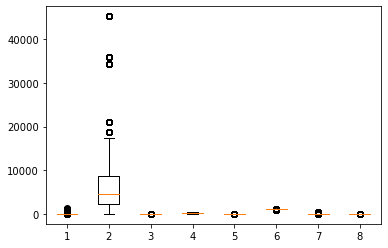

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

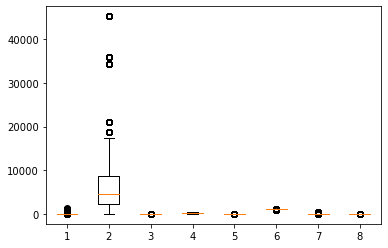

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

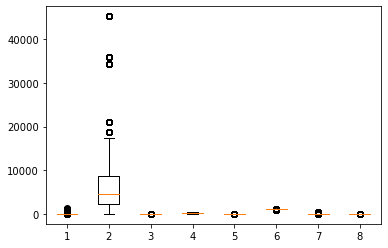

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

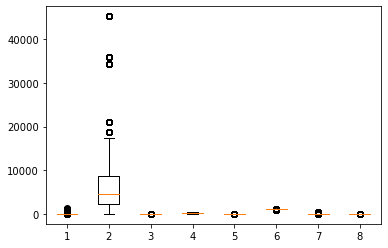

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

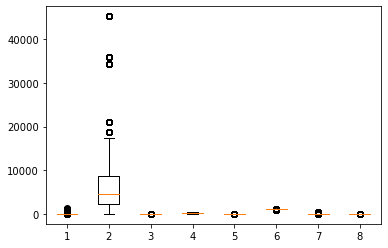

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

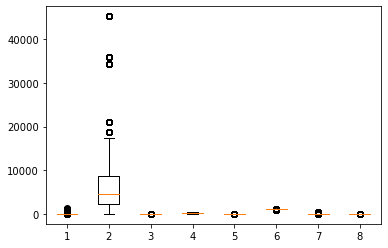

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

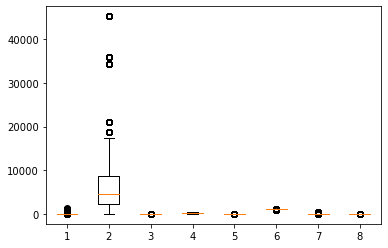

************************************************************
        yield  farm_area  temp_obs  wind_direction  dew_temp  \
0         0.0        690        25               0        20   
1         0.0        690        24              70        21   
2         0.0        690        22               0        21   
3         0.0        690        21               0        20   
4         0.0        690        20             250        20   
...       ...        ...       ...             ...       ...   
139768    0.0       2012         3             180        -8   
139769    0.0       2012         2             180        -8   
139770    0.0       2012         2             180        -7   
139771    0.0       2012         2             170        -6   
139772    0.0       2012         1             180        -5   

        pressure_sea_level  precipitation  wind_speed  
0                   1019.7            0.0           0  
1                   1020.2           -1.0           1  
2 

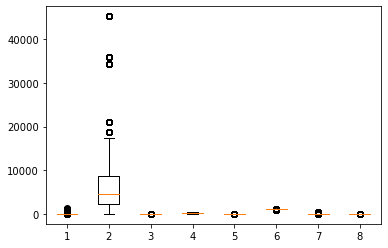

************************************************************


In [118]:
#checking the outliers
for col in num_cols:
    print(imputed_data)
    bp=plt.boxplot(imputed_data.dropna(), showcaps=True)
    print(bp.keys())
    for key in bp:
        print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')
    plt.show()
    print('*'*60)

In [119]:
imputed_data.head()

yield  farm_area  temp_obs  wind_direction  dew_temp  pressure_sea_level  \
0    0.0        690        25               0        20              1019.7   
1    0.0        690        24              70        21              1020.2   
2    0.0        690        22               0        21              1020.2   
3    0.0        690        21               0        20              1020.1   
4    0.0        690        20             250        20              1020.0   

   precipitation  wind_speed  
0            0.0           0  
1           -1.0           1  
2            0.0           0  
3            0.0           0  
4           -1.0           2

In [120]:
imputed_data.dtypes

yield                 float64
farm_area               int64
temp_obs                int64
wind_direction          int64
dew_temp                int64
pressure_sea_level    float64
precipitation         float64
wind_speed              int64
dtype: object

In [121]:
imputed_data.shape

(139773, 8)

In [122]:
imputed_data.insert(0, 'id', imputed_data.index)

In [123]:
imputed_data.duplicated().sum()

0

In [124]:
imputed_data.farm_area.duplicated().sum()

139689

In [125]:
imputed_data.head()

id  yield  farm_area  temp_obs  wind_direction  dew_temp  \
0   0    0.0        690        25               0        20   
1   1    0.0        690        24              70        21   
2   2    0.0        690        22               0        21   
3   3    0.0        690        21               0        20   
4   4    0.0        690        20             250        20   

   pressure_sea_level  precipitation  wind_speed  
0              1019.7            0.0           0  
1              1020.2           -1.0           1  
2              1020.2            0.0           0  
3              1020.1            0.0           0  
4              1020.0           -1.0           2

In [126]:
cat_cols = ['ingredient_type','farming_company', 'deidentified_location']

In [127]:
train_data = pd.merge(imputed_data,
                         train_farm_weather[cat_cols],
                         left_index=True,
                         right_index=True)

In [128]:
train_data.head()

id  yield  farm_area  temp_obs  wind_direction  dew_temp  \
0   0    0.0        690        25               0        20   
1   1    0.0        690        24              70        21   
2   2    0.0        690        22               0        21   
3   3    0.0        690        21               0        20   
4   4    0.0        690        20             250        20   

   pressure_sea_level  precipitation  wind_speed ingredient_type  \
0              1019.7            0.0           0               0   
1              1020.2           -1.0           1               0   
2              1020.2            0.0           0               0   
3              1020.1            0.0           0               0   
4              1020.0           -1.0           2               0   

  farming_company deidentified_location  
0               2                    12  
1               2                    12  
2               2                    12  
3               2                    12  
4               2                    12

In [129]:
train_data.dtypes

id                          int64
yield                     float64
farm_area                   int64
temp_obs                    int64
wind_direction              int64
dew_temp                    int64
pressure_sea_level        float64
precipitation             float64
wind_speed                  int64
ingredient_type          category
farming_company          category
deidentified_location    category
dtype: object

In [130]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [131]:
from pandas_profiling import ProfileReport #for profiling

In [132]:
profile = ProfileReport(train_data, title='Yield Prediction', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation of data

In [133]:
correlation=train_data.corr()
correlation

id     yield  farm_area  temp_obs  wind_direction  \
id                  1.000000  0.006305   0.145217 -0.251080        0.042768   
yield               0.006305  1.000000  -0.012592 -0.038393        0.007774   
farm_area           0.145217 -0.012592   1.000000 -0.061912        0.052550   
temp_obs           -0.251080 -0.038393  -0.061912  1.000000       -0.087005   
wind_direction      0.042768  0.007774   0.052550 -0.087005        1.000000   
dew_temp           -0.188995 -0.039005  -0.139609  0.787886       -0.143169   
pressure_sea_level -0.002040  0.004972  -0.045096 -0.205393       -0.097937   
precipitation       0.009138  0.001197   0.005992  0.011915       -0.020453   
wind_speed          0.033333 -0.002160  -0.034093 -0.059902        0.331880   

                    dew_temp  pressure_sea_level  precipitation  wind_speed  
id                 -0.188995           -0.002040       0.009138    0.033333  
yield              -0.039005            0.004972       0.001197   -0.002160  
farm_area          -0.139609           -0.045096       0.005992   -0.034093  
temp_obs            0.787886           -0.205393       0.011915   -0.059902  
wind_direction     -0.143169           -0.097937      -0.020453    0.331880  
dew_temp            1.000000           -0.163865       0.066014   -0.096415  
pressure_sea_level -0.163865            1.000000      -0.056574   -0.238235  
precipitation       0.066014           -0.056574       1.000000    0.012430  
wind_speed         -0.096415           -0.238235       0.012430    1.000000

<AxesSubplot:>

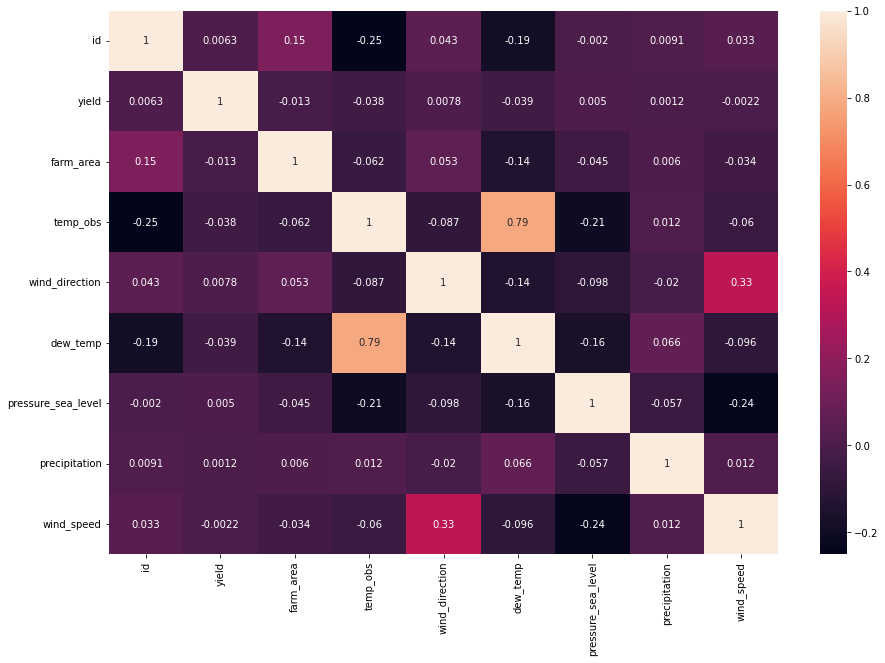

In [134]:
f,ax=plt.subplots(figsize=(15,10))
correlation=train_data.corr() 
sns.heatmap(correlation, ax=ax, annot=True,) 

# Model Building

### Train Test split 

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X =  train_data.drop('yield', axis = 1)
y = train_data['yield']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20,random_state = 120)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(111818, 11) (27955, 11)
(111818,) (27955,)


In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
sc = StandardScaler()

In [139]:
sc.fit(X_train)

StandardScaler()

In [140]:
X_train = sc.transform(X_train)

In [141]:
X_test= sc.transform(X_test)

In [142]:
X_train

array([[-1.09828123, -0.625645  ,  0.08675601, ...,  0.        ,
         1.52418136, -0.32684789],
       [-0.49439927, -0.68072721,  0.46899283, ...,  0.        ,
         1.52418136,  0.54110344],
       [ 0.42944575, -0.58034188, -0.29548081, ...,  0.        ,
        -0.25181588,  1.19206694],
       ...,
       [ 1.52934973,  0.94040618, -1.25107286, ...,  0.        ,
        -1.1398145 , -0.9778114 ],
       [ 0.32715964, -0.30662718,  1.23346647, ...,  0.        ,
        -1.1398145 ,  1.19206694],
       [-0.67241526, -0.35053329, -0.1999216 , ...,  0.        ,
         1.52418136,  0.32411561]])

In [143]:
X_test

array([[-0.903841  ,  0.17933365,  0.08675601, ...,  0.        ,
        -0.25181588, -0.76082356],
       [ 0.92289141, -0.46319239, -1.05995445, ...,  0.        ,
         1.52418136,  0.75809128],
       [-1.00179191, -0.73381369,  0.08675601, ...,  0.        ,
         1.52418136, -0.76082356],
       ...,
       [-1.12728996,  0.23820775,  1.61570329, ...,  0.        ,
        -0.25181588, -0.32684789],
       [-1.47001905,  0.32332573, -1.15551365, ...,  0.        ,
        -0.25181588,  1.62604261],
       [-1.7010732 , -0.73022138, -0.00880319, ...,  0.        ,
        -0.25181588,  0.97507911]])

# Building Random Forest Regressor 

In [144]:
from sklearn.ensemble import RandomForestRegressor #importing randomforest regressor
from sklearn.metrics import mean_squared_error     #importing mean squares error

In [145]:
# First create the base model to tune
rf = RandomForestRegressor()

In [146]:
#fitting the algorithm
rf.fit(X_train, y_train)

RandomForestRegressor()

In [147]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [148]:
train_pred

array([0.  , 0.  , 2.69, ..., 0.  , 0.  , 0.  ])

In [149]:
test_pred

array([0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.525571])

In [150]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))


0.8639673307610345
0.14754399100101134


In [151]:
#checking rmse metric
rmse=np.sqrt(mean_squared_error(y_test,test_pred))
print(" RMSE_score of Random forest regression is: ",rmse)

 RMSE_score of Random forest regression is:  19.68637311620005


# Hyper parameters tuning

In [152]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [153]:
#import randomized search
from sklearn.model_selection import RandomizedSearchCV

In [154]:
# Number of trees in random forest
n_estimators = [100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20,25,30]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [155]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [156]:
pprint(random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [100, 150, 200]}


In [157]:
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, 
                               cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [158]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  23.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  26.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=  23.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=  30.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=  31.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=150; total time=  30.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=150; total time=  10.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_est

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, verbose=2)

In [159]:
RF_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
          max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5,
           n_estimators=200, n_jobs=1,
         random_state=None, verbose=0)

In [160]:
%%time
RF_reg.fit(X_train,y_train)

CPU times: user 22.6 s, sys: 47.8 ms, total: 22.7 s
Wall time: 22.7 s


RandomForestRegressor(criterion='mse', max_depth=30, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      n_jobs=1)

In [161]:
train_pred1 = RF_reg.predict(X_train)
test_pred1 = RF_reg.predict(X_test)


In [162]:
train_pred1

array([0.        , 0.        , 4.81290979, ..., 0.        , 0.        ,
       0.        ])

In [163]:
test_pred1

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.31403927])

In [164]:
print(RF_reg.score(X_train, y_train))
print(RF_reg.score(X_test, y_test))

0.5917751932718309
0.20313794513822248


In [165]:
#checking rmse metric
rmse=np.sqrt(mean_squared_error(y_test,test_pred1))
print(" RMSE_score of Random forest regression is: ",rmse)

 RMSE_score of Random forest regression is:  19.033615739463404


# Building Linear Regression

In [166]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

In [167]:
lr=LinearRegression()

In [168]:
#fitting the algorithm
lr.fit(X_train,y_train)

LinearRegression()

In [169]:
train_pred3 = lr.predict(X_train)
test_pred3 = lr.predict(X_test)

In [170]:
#checking rmse metric
rmse=np.sqrt(mean_squared_error(y_test,test_pred3))
print(" RMSE_score of Linear Regression is: ",rmse)

 RMSE_score of Linear Regression is:  21.284969293139813


# Building Lasso Regression

In [171]:
#importing LassoRegression
from sklearn.linear_model import Lasso

In [172]:
lsr=Lasso()

In [173]:
#fitting the model
lsr.fit(X_train, y_train)

Lasso()

In [174]:
train_pred4 = lr.predict(X_train)
test_pred4 = lr.predict(X_test)

In [175]:
#checking rmse metric
rmse=np.sqrt(mean_squared_error(y_test,test_pred4))
print(" RMSE_score of Lasso Regression is: ",rmse)

 RMSE_score of Lasso Regression is:  21.284969293139813


# Building KNN

In [176]:
#importing KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=20)

In [177]:
# Create a KNN regressor object
k = 20

# Train the model on the training set
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=20)

In [178]:
# Use the trained model to make predictions on the test set
test_pred5 = knn.predict(X_test)


In [179]:
#checking rmse metric
rmse=np.sqrt(mean_squared_error(y_test,test_pred5))
print(" RMSE_score of KNN Regression is: ",rmse)

 RMSE_score of KNN Regression is:  20.006135290610064


# Prediction on testing data

In [180]:
# Reading the test data files
test_data = pd.read_csv('/kaggle/input/robust-yield-prediction/test_data.csv')
test_weather = pd.read_csv('/kaggle/input/robust-yield-prediction/test_weather.csv')

In [181]:
test_data.head() #checking top 5 rows 

date     farm_id ingredient_type  id
0  2017-01-01 00:00:00  fid_110884           ing_w   0
1  2017-01-01 00:00:00   fid_90053           ing_w   1
2  2017-01-01 00:00:00   fid_17537           ing_w   2
3  2017-01-01 00:00:00  fid_110392           ing_w   3
4  2017-01-01 00:00:00   fid_62402           ing_w   4

In [182]:
test_data.shape #checking the shape

(20848800, 4)

In [183]:
test_data.dtypes #checking the datatype

date               object
farm_id            object
ingredient_type    object
id                  int64
dtype: object

In [184]:
test_data.info() #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20848800 entries, 0 to 20848799
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   date             object
 1   farm_id          object
 2   ingredient_type  object
 3   id               int64 
dtypes: int64(1), object(3)
memory usage: 636.3+ MB


In [185]:
test_data.isnull().sum() #checking null values

date               0
farm_id            0
ingredient_type    0
id                 0
dtype: int64

In [186]:
test_weather.head() #checking top 5 rows in weather data

timestamp deidentified_location  temp_obs  cloudiness  \
0  2017-01-01 00:00:00         location 7369      17.8         4.0   
1  2017-01-01 01:00:00         location 7369      17.8         2.0   
2  2017-01-01 02:00:00         location 7369      16.1         0.0   
3  2017-01-01 03:00:00         location 7369      17.2         0.0   
4  2017-01-01 04:00:00         location 7369      16.7         2.0   

   wind_direction  dew_temp  pressure_sea_level  precipitation  wind_speed  
0           100.0      11.7              1021.4            NaN         3.6  
1           130.0      12.8              1022.0            0.0         3.1  
2           140.0      12.8              1021.9            0.0         3.1  
3           140.0      13.3              1022.2            0.0         3.1  
4           130.0      13.3              1022.3            0.0         2.6

In [187]:
test_weather.shape #checking the shape of weather data

(138825, 9)

In [188]:
test_weather.dtypes #checking the datatypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [189]:
test_weather.info() #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138825 entries, 0 to 138824
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              138825 non-null  object 
 1   deidentified_location  138825 non-null  object 
 2   temp_obs               138782 non-null  float64
 3   cloudiness             69760 non-null   float64
 4   wind_direction         132691 non-null  float64
 5   dew_temp               138641 non-null  float64
 6   pressure_sea_level     127942 non-null  float64
 7   precipitation          91037 non-null   float64
 8   wind_speed             138585 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.5+ MB


In [190]:
test_weather.isnull().sum() #checking the null values

timestamp                    0
deidentified_location        0
temp_obs                    43
cloudiness               69065
wind_direction            6134
dew_temp                   184
pressure_sea_level       10883
precipitation            47788
wind_speed                 240
dtype: int64

### Data cleaning

In [191]:
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S') #changing the format

In [192]:
test_data['farm_id'] = test_data['farm_id'].astype('str') #converting into string

In [193]:
test_weather['timestamp'] = pd.to_datetime(test_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [194]:
test_weather.drop('cloudiness', axis = 1, inplace =  True) #dropping the cloudiness column

In [195]:
test_farm = pd.merge(test_data,farm, on = 'farm_id') #merging test and farm data

In [196]:
test_farm .head()

date     farm_id ingredient_type   id  num_processing_plants  \
0 2017-01-01 00:00:00  fid_110884           ing_w    0                      7   
1 2017-01-01 01:00:00  fid_110884           ing_w  129                      7   
2 2017-01-01 02:00:00  fid_110884           ing_w  258                      7   
3 2017-01-01 03:00:00  fid_110884           ing_w  387                      7   
4 2017-01-01 04:00:00  fid_110884           ing_w  516                      7   

    farm_area farming_company deidentified_location  
0  690.455096     Obery Farms         location 7369  
1  690.455096     Obery Farms         location 7369  
2  690.455096     Obery Farms         location 7369  
3  690.455096     Obery Farms         location 7369  
4  690.455096     Obery Farms         location 7369

In [197]:
test_farm .rename(columns = {'date':'timestamp'},inplace = True) #renaming the column into timestamp

In [198]:
test_weather.drop('timestamp', axis=1, inplace=True) #dropping timestamp column

In [199]:
test_weather.drop('deidentified_location', axis=1, inplace=True) #dropping the column 

In [200]:
test_farm.shape #checking the shape

(21251760, 8)

In [201]:
test_farm.tail() #checking the bottom 5 rows

timestamp    farm_id ingredient_type        id  \
21251755 2017-12-28 07:00:00  fid_34139           ing_w  41673195   
21251756 2017-12-28 08:00:00  fid_34139           ing_w  41673445   
21251757 2017-12-28 09:00:00  fid_34139           ing_w  41673695   
21251758 2017-12-28 10:00:00  fid_34139           ing_w  41673945   
21251759 2017-12-28 11:00:00  fid_34139           ing_w  41674195   

          num_processing_plants    farm_area farming_company  \
21251755                      7  8572.252713     Wayne Farms   
21251756                      7  8572.252713     Wayne Farms   
21251757                      7  8572.252713     Wayne Farms   
21251758                      7  8572.252713     Wayne Farms   
21251759                      7  8572.252713     Wayne Farms   

         deidentified_location  
21251755         location 5150  
21251756         location 5150  
21251757         location 5150  
21251758         location 5150  
21251759         location 5150

In [202]:
test_farm.head() #checking the top 5 rows

timestamp     farm_id ingredient_type   id  num_processing_plants  \
0 2017-01-01 00:00:00  fid_110884           ing_w    0                      7   
1 2017-01-01 01:00:00  fid_110884           ing_w  129                      7   
2 2017-01-01 02:00:00  fid_110884           ing_w  258                      7   
3 2017-01-01 03:00:00  fid_110884           ing_w  387                      7   
4 2017-01-01 04:00:00  fid_110884           ing_w  516                      7   

    farm_area farming_company deidentified_location  
0  690.455096     Obery Farms         location 7369  
1  690.455096     Obery Farms         location 7369  
2  690.455096     Obery Farms         location 7369  
3  690.455096     Obery Farms         location 7369  
4  690.455096     Obery Farms         location 7369

In [203]:
test_weather.insert(0, 'id', test_weather.index) #inseting index values

In [204]:
test_farm_weather = pd.merge(test_farm,test_weather,on = 'id',how = 'left') #merging test and farm dataset on farm id

In [205]:
test_farm_weather.shape #checking the shape

(21251760, 14)

In [206]:
test_farm_weather['timestamp'].min(), test_farm_weather['timestamp'].max(), (test_farm_weather['timestamp'].max() -test_farm_weather['timestamp'].min())

(Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-12-31 23:00:00'),
 Timedelta('364 days 23:00:00'))

In [207]:
test_farm_weather.isnull().sum() #checking the null values

timestamp                       0
farm_id                         0
ingredient_type                 0
id                              0
num_processing_plants           0
farm_area                       0
farming_company                 0
deidentified_location           0
temp_obs                 21111902
wind_direction           21118036
dew_temp                 21112044
pressure_sea_level       21122825
precipitation            21160021
wind_speed               21112100
dtype: int64

## Converting categorical into numerical

In [208]:
#importing necessary libraries
from sklearn.preprocessing import LabelEncoder

In [209]:
le = LabelEncoder()

In [210]:
test_farm_weather.farming_company = le.fit_transform(test_farm_weather.farming_company)

In [211]:
#changing the datatype
test_farm_weather['farming_company'] = test_farm_weather['farming_company'].astype('category')

In [212]:
#changing the datatype
test_farm_weather.deidentified_location = le.fit_transform(test_farm_weather.deidentified_location)

In [213]:
test_farm_weather['deidentified_location'] = test_farm_weather['deidentified_location'].astype('category')

In [214]:
test_farm_weather.ingredient_type = le.fit_transform(test_farm_weather.ingredient_type)

In [215]:
#changing the datatype
test_farm_weather['ingredient_type'] = test_farm_weather['ingredient_type'].astype('category')

In [216]:
test_farm_weather.head() #checking top 5 rows

timestamp     farm_id ingredient_type   id  num_processing_plants  \
0 2017-01-01 00:00:00  fid_110884               0    0                      7   
1 2017-01-01 01:00:00  fid_110884               0  129                      7   
2 2017-01-01 02:00:00  fid_110884               0  258                      7   
3 2017-01-01 03:00:00  fid_110884               0  387                      7   
4 2017-01-01 04:00:00  fid_110884               0  516                      7   

    farm_area farming_company deidentified_location  temp_obs  wind_direction  \
0  690.455096               8                    12      17.8           100.0   
1  690.455096               8                    12      11.7             0.0   
2  690.455096               8                    12      22.2             NaN   
3  690.455096               8                    12      17.8           120.0   
4  690.455096               8                    12      20.6           170.0   

   dew_temp  pressure_sea_level  precipitation  wind_speed  
0      11.7              1021.4            NaN         3.6  
1      10.6              1014.7            0.0         0.0  
2      12.8              1027.0            0.0         2.1  
3      13.9              1024.4            0.0         2.1  
4      18.3              1007.6            0.0         4.1

In [217]:
# Number of rows to drop 
n = 402960
  
# Removing last n rows 
Test_Data1 = test_farm_weather.iloc[:-n] 
  
# Printing dataframe 
print(Test_Data1)

                   timestamp     farm_id ingredient_type        id  \
0        2017-01-01 00:00:00  fid_110884               0         0   
1        2017-01-01 01:00:00  fid_110884               0       129   
2        2017-01-01 02:00:00  fid_110884               0       258   
3        2017-01-01 03:00:00  fid_110884               0       387   
4        2017-01-01 04:00:00  fid_110884               0       516   
...                      ...         ...             ...       ...   
20848795 2017-12-28 07:00:00   fid_56104               0  41673149   
20848796 2017-12-28 08:00:00   fid_56104               0  41673399   
20848797 2017-12-28 09:00:00   fid_56104               0  41673649   
20848798 2017-12-28 10:00:00   fid_56104               0  41673899   
20848799 2017-12-28 11:00:00   fid_56104               0  41674149   

          num_processing_plants    farm_area farming_company  \
0                             7   690.455096               8   
1                             7

In [218]:
Test_Data1.head() #checking top 5 rows

timestamp     farm_id ingredient_type   id  num_processing_plants  \
0 2017-01-01 00:00:00  fid_110884               0    0                      7   
1 2017-01-01 01:00:00  fid_110884               0  129                      7   
2 2017-01-01 02:00:00  fid_110884               0  258                      7   
3 2017-01-01 03:00:00  fid_110884               0  387                      7   
4 2017-01-01 04:00:00  fid_110884               0  516                      7   

    farm_area farming_company deidentified_location  temp_obs  wind_direction  \
0  690.455096               8                    12      17.8           100.0   
1  690.455096               8                    12      11.7             0.0   
2  690.455096               8                    12      22.2             NaN   
3  690.455096               8                    12      17.8           120.0   
4  690.455096               8                    12      20.6           170.0   

   dew_temp  pressure_sea_level  precipitation  wind_speed  
0      11.7              1021.4            NaN         3.6  
1      10.6              1014.7            0.0         0.0  
2      12.8              1027.0            0.0         2.1  
3      13.9              1024.4            0.0         2.1  
4      18.3              1007.6            0.0         4.1

In [219]:
Test_Data1.nunique() #checking unique values

timestamp                    8760
farm_id                      1402
ingredient_type                 4
id                       20445840
num_processing_plants          18
farm_area                    1366
farming_company                16
deidentified_location          16
temp_obs                      612
wind_direction                 53
dew_temp                      528
pressure_sea_level            713
precipitation                 144
wind_speed                     70
dtype: int64

In [220]:
num_cols = ['id','farm_area','temp_obs', 'wind_direction', 'dew_temp', 'pressure_sea_level', 
       'precipitation', 'wind_speed']

In [221]:
#import necessary librabries
from sklearn.impute import SimpleImputer

In [222]:
#imputing median 
num_imputer = SimpleImputer(strategy = 'median')

imputed_data_test = pd.DataFrame(num_imputer.fit_transform(Test_Data1[num_cols]),
                               columns = num_cols)

In [223]:
imputed_data_test.head() #checking top 5 rows

id   farm_area  temp_obs  wind_direction  dew_temp  pressure_sea_level  \
0    0.0  690.455096      17.8           100.0      11.7              1021.4   
1  129.0  690.455096      11.7             0.0      10.6              1014.7   
2  258.0  690.455096      22.2           190.0      12.8              1027.0   
3  387.0  690.455096      17.8           120.0      13.9              1024.4   
4  516.0  690.455096      20.6           170.0      18.3              1007.6   

   precipitation  wind_speed  
0            0.0         3.6  
1            0.0         0.0  
2            0.0         2.1  
3            0.0         2.1  
4            0.0         4.1

In [224]:
imputed_data_test.head()

id   farm_area  temp_obs  wind_direction  dew_temp  pressure_sea_level  \
0    0.0  690.455096      17.8           100.0      11.7              1021.4   
1  129.0  690.455096      11.7             0.0      10.6              1014.7   
2  258.0  690.455096      22.2           190.0      12.8              1027.0   
3  387.0  690.455096      17.8           120.0      13.9              1024.4   
4  516.0  690.455096      20.6           170.0      18.3              1007.6   

   precipitation  wind_speed  
0            0.0         3.6  
1            0.0         0.0  
2            0.0         2.1  
3            0.0         2.1  
4            0.0         4.1

In [225]:
cols = ['id','temp_obs','dew_temp','wind_speed','wind_direction','farm_area']

imputed_data_test[cols] = imputed_data_test[cols].astype('int64')

In [226]:
#merging final dataset
Final_data_test = pd.merge(imputed_data_test, 
                         Test_Data1[cat_cols], 
                         left_index=True,
                         right_index=True)

In [227]:
Final_data_test.shape #checking the shape

(20848800, 11)

In [228]:
Final_data_test.dtypes #checking the datatypes

id                          int64
farm_area                   int64
temp_obs                    int64
wind_direction              int64
dew_temp                    int64
pressure_sea_level        float64
precipitation             float64
wind_speed                  int64
ingredient_type          category
farming_company          category
deidentified_location    category
dtype: object

In [229]:
#predicting test values
Predictions =RF_reg.predict(Final_data_test)

In [230]:
#checking the type of predications
type(Predictions)

numpy.ndarray

In [231]:
Predictions

array([15.97779766,  6.12620341, 13.92467287, ..., 19.69878275,
       19.69878275, 19.69878275])

In [232]:
Predictions1 = np.round(Predictions,3)

In [233]:
Predictions[0:10]

array([15.97779766,  6.12620341, 13.92467287, 13.92467287, 19.09577244,
       16.79167554,  6.12620341, 19.09577244, 18.27342444, 13.52480746])

## Submission file 

In [234]:
#reading sample file
sample_file= pd.read_csv('/kaggle/input/robust/sample_submission.csv')

In [235]:
sample_file.shape #checking the shape

(20848800, 2)

In [236]:
sample_file.head() #checking the top 5 rows of sample dataset

id  yield
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0

In [237]:
sample_file.tail() #checking the bottom 5 rows

id  yield
20848795  41696845      0
20848796  41696846      0
20848797  41696847      0
20848798  41696848      0
20848799  41696849      0

In [238]:
#creating dataframe for id and yield
submission  = pd.DataFrame({'id': test_data.id, 'yield': Predictions})

In [239]:
submission.head()

id      yield
0   0  15.977798
1   1   6.126203
2   2  13.924673
3   3  13.924673
4   4  19.095772

In [240]:
submission.tail()

id      yield
20848795  41696845  19.698783
20848796  41696846  19.698783
20848797  41696847  19.698783
20848798  41696848  19.698783
20848799  41696849  19.698783

<AxesSubplot:>

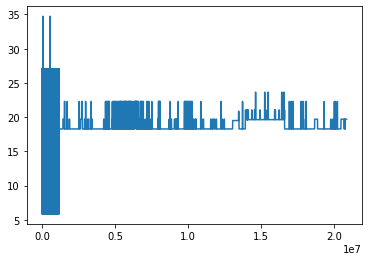

In [241]:
submission['yield'].plot()

In [242]:
#creating a submission file for id and yield
submission.to_csv('sample_submit123.csv', index = None)